In [1]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive
2020_CARLA_challenge		      pretrained_weights
Assignment1-Regression.ipynb	      test
data				      test_ford
DAVEII-LSTM.ipynb		      Untitled0.ipynb
deepnncar-classification-dataset      Untitled1.ipynb
deepnncar-classification-dataset.zip  Untitled2.ipynb
DeepNNCar.ipynb			      validation
deepnncar-regression-dataset.csv      VGG16-mask.ipynb
Effects_Of_Modifying_Alpha.eps	      VGG.ipynb
masks


In [4]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/Colab Notebooks/masks/train", target_size=(224,224))
vdata = ImageDataGenerator()
valdata = vdata.flow_from_directory(directory="/content/drive/My Drive/Colab Notebooks/masks/validation", target_size=(224,224))

Found 1949 images belonging to 2 classes.
Found 591 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [6]:
opt = Adam(lr=0.000005)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [7]:
checkpoint = ModelCheckpoint("vgg16_mask.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
start_time = time.time()
hist = model.fit_generator(steps_per_epoch=7,generator=traindata, validation_data=valdata, validation_steps=10, epochs=100, callbacks=[checkpoint,early])
print("--- %s seconds ---" % (time.time() - start_time))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.7139 - accuracy: 0.5089
Epoch 00001: val_accuracy improved from -inf to 0.85625, saving model to vgg16_mask.h5
7/7 [==============================] - 134s 19s/step - loss: 0.7139 - accuracy: 0.5089 - val_loss: 0.5920 - val_accuracy: 0.8562
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.5933 - accuracy: 0.6968
Epoch 00002: val_accuracy did not improve from 0.85625
7/7 [==============================] - 75s 11s/step - loss: 0.5933 - accuracy: 0.6968 - val_loss: 0.5179 - val_accuracy: 0.8156
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.4739 - accuracy: 0.9062
Epoch 00003: val_accuracy improved from 0.85625 to 0.90938, saving model to vgg16_mask.h5
7/7 [==============================] - 73s 10s/step - loss: 0.4739 - accuracy: 0.9062 - val_loss: 0.4286 - val_accuracy: 0.9094
Epoch 4/100
7/7 [===========

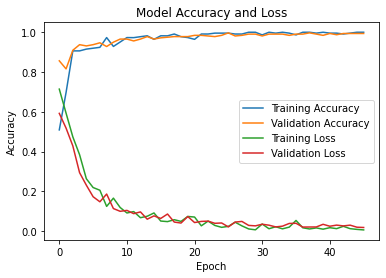

In [8]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title("Model Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training Accuracy", "Validation Accuracy", "Training Loss", "Validation Loss"])
plt.show()

In [10]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(directory="/content/drive/My Drive/Colab Notebooks/masks/test", target_size=(224,224))

from keras.models import load_model
saved_model = load_model("vgg16_mask.h5")
score, acc = saved_model.evaluate_generator(test_generator)
print('Test score:', score)
print('Test accuracy:', acc)

Found 592 images belonging to 2 classes.
Test score: 0.07291171699762344
Test accuracy: 0.9797297120094299
